# Análise Exploratória de Dados


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
!pip install netCDF4
#Rodar essa célula e depois de terminar a execução ir em "Runtime"->"Restart Runtime"

In [ ]:
!pwd

/content


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
from mpl_toolkits.basemap import Basemap,shiftgrid
# import pandas as pd
import netCDF4 as nc

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Datasets/atlantic.csv')
df2 = pd.read_csv('Datasets/pacific.csv')
# df = df.append(df2)
# del df2
# df = pd.read_csv('Datasets/atlantic.csv')
df.Date = pd.to_datetime(df.Date, format="%Y%m%d")
df["month"] = df["Date"].apply(lambda x: x.month)
df["year"] = df["Date"].apply(lambda x: x.year)
df.Latitude = df.Latitude.apply(lambda x: -float(x.rstrip("S")) if x.endswith("S") else float(x.rstrip("N")))
df.Longitude = df.Longitude.apply(lambda x: -float(x.rstrip("W")) if x.endswith("W") else float(x.rstrip("E")))

df2.Date = pd.to_datetime(df2.Date, format="%Y%m%d")
df2["month"] = df2["Date"].apply(lambda x: x.month)
df2["year"] = df2["Date"].apply(lambda x: x.year)
df2.Latitude = df2.Latitude.apply(lambda x: -float(x.rstrip("S")) if x.endswith("S") else float(x.rstrip("N")))
df2.Longitude = df2.Longitude.apply(lambda x: -float(x.rstrip("W")) if x.endswith("W") else float(x.rstrip("E")))

Text(0.5, 1.0, 'Contagem de tornados por mês no Pacífico')

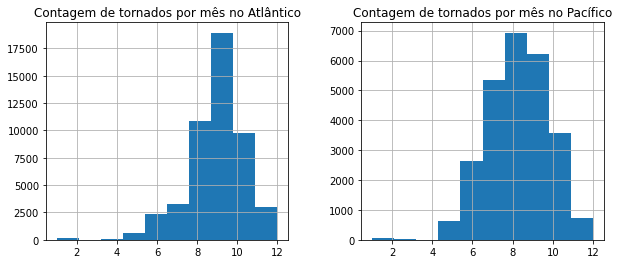

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))
df.hist('month', ax=axs[0])
# plt.hist(df.month, ax=axs[0])
axs[0].set_title("Contagem de tornados por mês no Atlântico") #tepo
df2.hist('month', ax=axs[1])
axs[1].set_title("Contagem de tornados por mês no Pacífico")

In [ ]:
sst_mean = nc.Dataset('Datasets/enh/sst.mean.nc','r')
rhum_mean = nc.Dataset('Datasets/enh/rhum.mean.nc','r')
wspd_mean = nc.Dataset('Datasets/enh/wspd.mean.nc','r')

In [ ]:
x = sst_mean['sst'][:]

In [ ]:
rhum_mean['rhum']

<class 'netCDF4._netCDF4.Variable'>
int16 rhum(time, lat, lon)
    unpacked_valid_range: [  0. 100.]
    actual_range: [ 10.8 100. ]
    units: %
    precision: 1
    missing_value: 32766
    _FillValue: 32766
    long_name: Relative Humidity Monthly Mean at Surface
    dataset: ICOADS 2-degree Enhanced
    var_desc: Relative Humidity
    level_desc: Surface
    statistic: Mean
    parent_stat: Individual Obs
    add_offset: 3276.5
    scale_factor: 0.1
    valid_range: [-32765 -31765]
unlimited dimensions: time
current shape = (2646, 90, 180)
filling on

In [ ]:
x.shape

(2646, 90, 180)

(array([ 3.,  3., 12., 20., 30., 36., 32., 23., 30.,  6.]),
 array([-0.30999756,  0.36400145,  1.0380005 ,  1.7119995 ,  2.3859985 ,
         3.0599976 ,  3.7339966 ,  4.4079957 ,  5.0819945 ,  5.755994  ,
         6.4299927 ], dtype=float32),
 <a list of 10 Patch objects>)

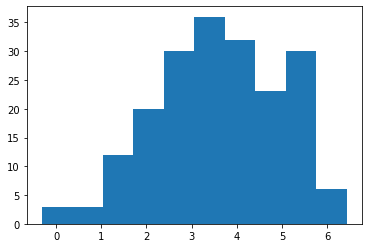

In [ ]:
plt.hist(x[:,70, 40][x[:,70, 40].data<20000]) #testes com masked array